<a href="https://colab.research.google.com/github/riccardoorru/painting_genre_recognition/blob/main/3_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import os
from tqdm import tqdm, tqdm_notebook
import random
from google.colab import drive
from google.colab import files
import shutil

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.applications import *
from tensorflow.keras.callbacks import *
from tensorflow.keras.initializers import *
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from numpy.random import seed
import pickle
seed(1)
tf.random.set_seed(1)

In [2]:
# mount drive
from google.colab import drive
drive.mount('RiccardoOrruProject', force_remount=True)

Mounted at RiccardoOrruProject


In [3]:
def take_classes_size(directory):
  classes_size=[]
  classes_name=[]
  for dir in os.listdir(directory):
    #print(directory+"/"+dir)
    dir_size=0
    for dir2 in  os.listdir(directory+"/"+dir):
      dir_size=dir_size+len(os.listdir(directory+"/"+dir+"/"+dir2))
    classes_size.append(dir_size)
    classes_name.append(dir)
    print(dir+": ",dir_size)
    dir_size=0
  return classes_name,classes_size

In [4]:
#I percorsi sono diversi in quanto la cartella è stata rinominata per la consegna
# [Deep Learning Project] = Orru
root_path = "RiccardoOrruProject/MyDrive/Deep Learning Project"
dataset_dir = os.path.join(root_path, "Dataset")
train_dir = os.path.join(dataset_dir, 'train/genre')
test_dir = os.path.join(dataset_dir, 'val/genre')
balanced_train_dir = "RiccardoOrruProject/MyDrive/Deep Learning Project/Dataset/balanced_train"
balanced_test_dir = "RiccardoOrruProject/MyDrive/Deep Learning Project/Dataset/balanced_test"

In [5]:
classes_name, classes_size = take_classes_size(balanced_train_dir)

Romanticism:  450
Primitivism:  450
Baroque:  450
Symbolism:  450
Expressionism:  450
Early-Renaissance:  450
Cubism:  450
Abstractionism:  450
Mannerism:  450
Pop-Art:  450
High-Renaissance:  450
Surrealism:  450
Post-Impressionism:  450
Impressionism:  450


In [6]:
#Set the parameter used to load the dataset
BATCH_SIZE = 64
IMAGE_HEIGHT = 180
IMAGE_WIDTH = 180

In [7]:
from tensorflow.keras.utils import image_dataset_from_directory
train_dataset = image_dataset_from_directory(
    balanced_train_dir,
    labels='inferred',
    label_mode='categorical',
    color_mode='rgb',
    image_size=(IMAGE_HEIGHT, IMAGE_WIDTH),
    batch_size=BATCH_SIZE,
    validation_split=0.1,
    subset="training",
    shuffle=True,
    seed=1024
)

validation_dataset = image_dataset_from_directory(
    balanced_train_dir,
    labels='inferred',
    label_mode='categorical',
    color_mode='rgb',
    image_size=(IMAGE_HEIGHT, IMAGE_WIDTH),
    batch_size=BATCH_SIZE,
    validation_split=0.1,
    subset="validation",
    shuffle=True,
    seed=1024
)

test_dataset = image_dataset_from_directory(
    balanced_test_dir,  # Sostituisci con il percorso della directory di test
    labels='inferred',
    label_mode='categorical',
    color_mode='rgb',
    image_size=(IMAGE_HEIGHT, IMAGE_WIDTH),
    batch_size=BATCH_SIZE,
    shuffle=False  # Non è necessario mescolare il set di test
)



Found 6300 files belonging to 14 classes.
Using 5670 files for training.
Found 6300 files belonging to 14 classes.
Using 630 files for validation.
Found 1564 files belonging to 14 classes.


In [8]:
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.regularizers import l2

# Definizione del modello con dropout e regolarizzazione L2
model = models.Sequential()

model.add(layers.Rescaling(1./255, input_shape=(180, 180, 3)))

model.add(layers.Conv2D(filters=32, kernel_size=3, strides=1, activation="relu", padding="valid"))
model.add(layers.MaxPooling2D(pool_size=2))
model.add(layers.Dropout(0.25))  # Aggiunta di dropout

model.add(layers.Conv2D(filters=64, kernel_size=3, strides=1, activation="relu", padding="valid"))
model.add(layers.MaxPooling2D(pool_size=2))
model.add(layers.Dropout(0.25))  # Aggiunta di dropout

model.add(layers.Conv2D(filters=128, kernel_size=3, strides=1, activation="relu", padding="valid"))
model.add(layers.Conv2D(filters=128, kernel_size=3, strides=1, activation="relu", padding="valid"))
model.add(layers.MaxPooling2D(pool_size=2))
model.add(layers.Dropout(0.25))  # Aggiunta di dropout

model.add(layers.Conv2D(filters=256, kernel_size=3, strides=1, activation="relu", padding="valid"))
model.add(layers.MaxPooling2D(pool_size=2))
model.add(layers.Dropout(0.25))  # Aggiunta di dropout

model.add(layers.Conv2D(filters=256, kernel_size=3, strides=1, activation="relu", padding="valid"))
model.add(layers.MaxPooling2D(pool_size=2))
model.add(layers.Dropout(0.25))  # Aggiunta di dropout

model.add(layers.Flatten())
model.add(layers.Dropout(0.5))  # Aggiunta di dropout
model.add(layers.Dense(256, activation="relu", kernel_regularizer=l2(0.01)))  # Regolarizzazione L2
model.add(layers.Dropout(0.25))  # Aggiunta di dropout

model.add(layers.Dense(14, activation="softmax"))

# Compilazione del modello
model.compile(optimizer='adam',
              loss='categorical_crossentropy',  # Assicurati di utilizzare la loss corretta per il tuo problema
              metrics=['accuracy'])


In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 89, 89, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 89, 89, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 43, 43, 64)        0         
 g2D)                                                   

In [10]:
optimizer = keras.optimizers.Adam(learning_rate=1e-3)

model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])



In [11]:
history = model.fit(train_dataset, epochs=75, validation_data=validation_dataset)


Epoch 1/75
89/89 [==============================] - 1510s 15s/step - loss: 3.7226 - accuracy: 0.1062 - val_loss: 2.6290 - val_accuracy: 0.1127
Epoch 2/75
89/89 [==============================] - 33s 339ms/step - loss: 2.4845 - accuracy: 0.1510 - val_loss: 2.4858 - val_accuracy: 0.1365
Epoch 3/75
89/89 [==============================] - 30s 310ms/step - loss: 2.3704 - accuracy: 0.1880 - val_loss: 2.3612 - val_accuracy: 0.1873
Epoch 4/75
89/89 [==============================] - 29s 308ms/step - loss: 2.3103 - accuracy: 0.2044 - val_loss: 2.3712 - val_accuracy: 0.1905
Epoch 5/75
89/89 [==============================] - 29s 310ms/step - loss: 2.2766 - accuracy: 0.2224 - val_loss: 2.3195 - val_accuracy: 0.2048
Epoch 6/75
89/89 [==============================] - 30s 315ms/step - loss: 2.2297 - accuracy: 0.2480 - val_loss: 2.2362 - val_accuracy: 0.2492
Epoch 7/75
89/89 [==============================] - 30s 314ms/step - loss: 2.1954 - accuracy: 0.2584 - val_loss: 2.2359 - val_accuracy: 0.2302

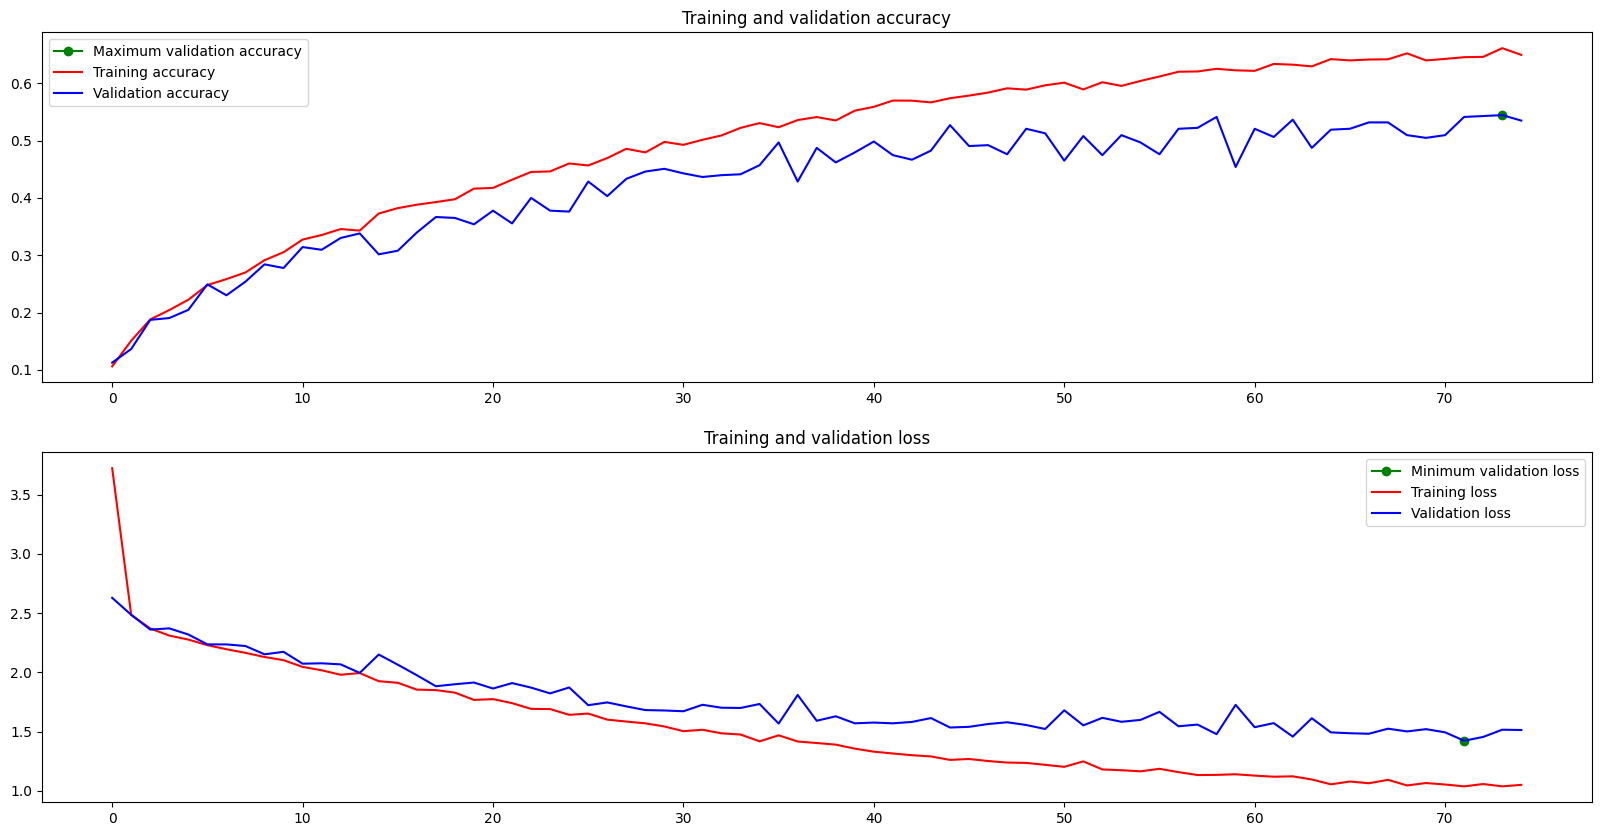

In [19]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 10))

i_acc = np.argmax(val_acc)
x_min_acc = epochs[i_acc]
y_min_acc = val_acc[i_acc]
ax1.plot(x_min_acc, y_min_acc, 'g', marker='o', label="Maximum validation accuracy")

ax1.plot(epochs, acc, 'r', label='Training accuracy')
ax1.plot(epochs, val_acc, 'b', label='Validation accuracy')
ax1.set_title('Training and validation accuracy')
ax1.legend()

i_loss = np.argmin(val_loss)
x_min_loss = epochs[i_loss]
y_min_loss = val_loss[i_loss]
ax2.plot(x_min_loss, y_min_loss, 'g', marker='o', label="Minimum validation loss")

ax2.plot(epochs, loss, 'r', label='Training loss')
ax2.plot(epochs, val_loss, 'b', label='Validation loss')
ax2.set_title('Training and validation loss')
ax2.legend()

plt.show()


In [16]:

test_loss, test_accuracy = model.evaluate(test_dataset)

25/25 [==============================] - 14s 568ms/step - loss: 2.4264 - accuracy: 0.3421


In [14]:

print("Loss: " + str(test_loss))
print("Accuracy: " + str(test_accuracy))

history.history["test_loss"] = test_loss
history.history["test_accuracy"] = test_accuracy

Loss: 2.4263718128204346
Accuracy: 0.34207162261009216


In [15]:


dir_name = os.path.join(root_path, "Models")
if not os.path.exists(dir_name):
  os.makedirs(dir_name)
model.save(os.path.join(dir_name, 'cnnBalancedDS.h5'))
with open(os.path.join(dir_name, 'trainHistory'), 'wb') as file_pi:
    pickle.dump(history.history, file_pi)


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
